# 구글 드라이브 연결

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 라이브러리 불러오기

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 데이터프레임으로 저장

In [ ]:
# read xlsx to dataframe from path
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/AI/pone.0197032.s001.xlsx')

df

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,Plt,BUN,Cre,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,23.2,17.0,1.69,29.0,48.0,506.0,17.4,1.0,NaN,NaN
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,24.3,23.1,3.08,36.0,35.0,883.0,0.46,1.0,NaN,NaN
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,31.2,19.4,1.42,33.0,16.0,815.0,0.16,1.0,NaN,NaN
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,33.3,32.9,4.20,33.0,54.0,173.0,1,1.0,NaN,NaN
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,14.1,21.0,1.33,77.0,36.0,386.0,0.103,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,26.1,33.4,1.41,104.0,46.0,3836.0,3.7,1.0,1.0,0.0
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,25.4,63.6,2.01,37.0,19.0,1606.0,1.29,1.0,1.0,1.0
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,8.9,31.5,2.25,140.0,53.0,4388.0,10.74,1.0,1.0,0.0
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,20.2,15.2,0.96,20.0,11.0,61.0,0.06,1.0,1.0,0.0


In [ ]:
raw = df.copy()

# 컬럼명 출력

In [ ]:
# print columns of raw
raw.columns

Index(['Sex_1male_2female', 'Age', 'Weather_1sunny_2cloudy_3rainy_4missing',
       'Location_1outdoor_indoor', 'Functionaldependency_1notdisable_2disable',
       'HT', 'HeartDisease', 'Pscyco', 'DM', 'CerevD', 'ParkinD', 'CKD',
       'Dementia', 'PreSBP', 'PreRR', 'PreGCSlessthan15', 'PreBT', 'PreHR',
       'Abdminal', 'Muscular', 'GCS', 'SBP', 'BT', 'HR', 'WBC', 'Ht', 'Plt',
       'BUN', 'Cre', 'AST', 'ALT', 'CK', 'CRP', 'Admission1', 'ICU',
       'Deadtodischarge'],
      dtype='object')

# 타겟 생성

In [ ]:
# 타겟 생성 (Admission1, ICU, 사망 중 하나라도 1이면 위험)
raw['target'] = (
    (raw['Admission1'] == 1) |
    (raw['ICU'] == 1) |
    (raw['Deadtodischarge'] == 1)
).astype(int)

In [ ]:
raw

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,BUN,Cre,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge,target
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,17.0,1.69,29.0,48.0,506.0,17.4,1.0,NaN,NaN,1
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,23.1,3.08,36.0,35.0,883.0,0.46,1.0,NaN,NaN,1
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,19.4,1.42,33.0,16.0,815.0,0.16,1.0,NaN,NaN,1
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,32.9,4.20,33.0,54.0,173.0,1,1.0,NaN,NaN,1
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,21.0,1.33,77.0,36.0,386.0,0.103,1.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,33.4,1.41,104.0,46.0,3836.0,3.7,1.0,1.0,0.0,1
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,63.6,2.01,37.0,19.0,1606.0,1.29,1.0,1.0,1.0,1
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,31.5,2.25,140.0,53.0,4388.0,10.74,1.0,1.0,0.0,1
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,15.2,0.96,20.0,11.0,61.0,0.06,1.0,1.0,0.0,1


# 라벨이 전부 결측(NaN)인 행 제거

In [ ]:
mask_all_missing = raw[['Admission1','ICU','Deadtodischarge']].isna().all(axis=1)
raw = raw[~mask_all_missing]

In [ ]:
raw

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,BUN,Cre,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge,target
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,17.0,1.69,29.0,48.0,506.0,17.4,1.0,NaN,NaN,1
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,23.1,3.08,36.0,35.0,883.0,0.46,1.0,NaN,NaN,1
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,19.4,1.42,33.0,16.0,815.0,0.16,1.0,NaN,NaN,1
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,32.9,4.20,33.0,54.0,173.0,1,1.0,NaN,NaN,1
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,21.0,1.33,77.0,36.0,386.0,0.103,1.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,33.4,1.41,104.0,46.0,3836.0,3.7,1.0,1.0,0.0,1
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,63.6,2.01,37.0,19.0,1606.0,1.29,1.0,1.0,1.0,1
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,31.5,2.25,140.0,53.0,4388.0,10.74,1.0,1.0,0.0,1
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,15.2,0.96,20.0,11.0,61.0,0.06,1.0,1.0,0.0,1


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3028 entries, 0 to 3174
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sex_1male_2female                          2995 non-null   float64
 1   Age                                        3021 non-null   float64
 2   Weather_1sunny_2cloudy_3rainy_4missing     2519 non-null   float64
 3   Location_1outdoor_indoor                   1760 non-null   float64
 4   Functionaldependency_1notdisable_2disable  2701 non-null   float64
 5   HT                                         3028 non-null   int64  
 6   HeartDisease                               3028 non-null   int64  
 7   Pscyco                                     3028 non-null   int64  
 8   DM                                         3028 non-null   int64  
 9   CerevD                                     3028 non-null   int64  
 10  ParkinD                      

In [ ]:
# Age 결측치 보완
raw['Age'] = pd.to_numeric(raw['Age'], errors='coerce')
raw['Age'] = raw['Age'].fillna(raw['Age'].median())

# HR 결측치 제거
raw['HR'] = pd.to_numeric(raw['HR'], errors='coerce')
raw = raw.dropna(subset=['HR'])

/tmp/ipython-input-1699054825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['Age'] = pd.to_numeric(raw['Age'], errors='coerce')
/tmp/ipython-input-1699054825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['Age'] = raw['Age'].fillna(raw['Age'].median())
/tmp/ipython-input-1699054825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

# 학습용 피처 생성 (나이별 최대 심박수)

In [ ]:
raw['HRmax'] = 220 - raw['Age']            # 나이별 최대 심박수
raw['hr_ratio'] = raw['HR'] / raw['HRmax'] # 최대 심박수 대비 현재 심박수 비율

/tmp/ipython-input-839555144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['HRmax'] = 220 - raw['Age']            # 나이별 최대 심박수
/tmp/ipython-input-839555144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['hr_ratio'] = raw['HR'] / raw['HRmax'] # 최대 심박수 대비 현재 심박수 비율


In [ ]:
raw

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge,target,HRmax,hr_ratio
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,29.0,48.0,506.0,17.4,1.0,NaN,NaN,1,196.0,0.637755
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,36.0,35.0,883.0,0.46,1.0,NaN,NaN,1,177.0,0.491525
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,33.0,16.0,815.0,0.16,1.0,NaN,NaN,1,162.0,0.654321
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,33.0,54.0,173.0,1,1.0,NaN,NaN,1,174.0,0.609195
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,77.0,36.0,386.0,0.103,1.0,1.0,NaN,1,163.0,0.926380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,104.0,46.0,3836.0,3.7,1.0,1.0,0.0,1,166.0,0.759036
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,37.0,19.0,1606.0,1.29,1.0,1.0,1.0,1,158.0,0.936709
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,140.0,53.0,4388.0,10.74,1.0,1.0,0.0,1,140.0,1.000000
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,20.0,11.0,61.0,0.06,1.0,1.0,0.0,1,136.0,0.941176


# 학습용 피처 선택 (라벨과 관계 없는 컬럼 제외)

In [ ]:
feature_cols = ['Age', 'HR', 'HRmax', 'hr_ratio']
X = raw[feature_cols]
y = raw['target']

In [ ]:
X

,Age,HR,HRmax,hr_ratio
0,24.0,125.0,196.0,0.637755
1,43.0,87.0,177.0,0.491525
2,58.0,106.0,162.0,0.654321
3,46.0,106.0,174.0,0.609195
4,57.0,151.0,163.0,0.926380
...,...,...,...,...
3170,54.0,126.0,166.0,0.759036
3171,62.0,148.0,158.0,0.936709
3172,80.0,140.0,140.0,1.000000
3173,84.0,128.0,136.0,0.941176


# 데이터 탐색

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 86.8 MB/s eta 0:00:00


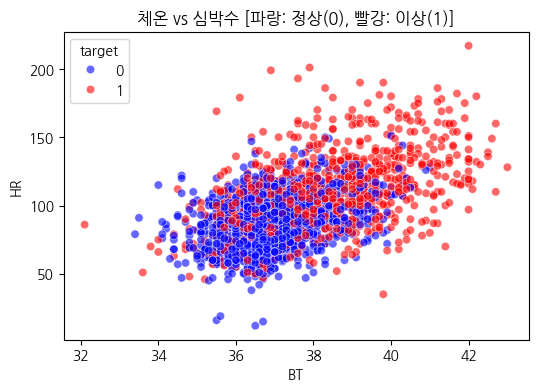

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import seaborn as sns

# 1) BT vs HR 산점도 (색: target)
plt.figure(figsize=(6,4))
sns.scatterplot(data=raw, x="BT", y="HR", hue="target", alpha=0.6, palette={0:"blue",1:"red"})
plt.title("체온 vs 심박수 [파랑: 정상(0), 빨강: 이상(1)]")
plt.show()


/tmp/ipython-input-3257661021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw, x="target", y="HR", palette="Set2")


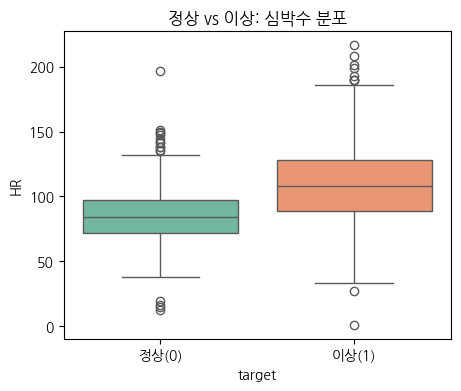

In [ ]:
# 2) 정상 vs 이상 그룹 HR 분포
plt.figure(figsize=(5,4))
sns.boxplot(data=raw, x="target", y="HR", palette="Set2")
plt.xticks([0,1], ["정상(0)", "이상(1)"])
plt.title("정상 vs 이상: 심박수 분포")
plt.show()

/tmp/ipython-input-3070923168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["AgeGroup"] = pd.cut(raw["Age"], bins=bins, labels=labels, right=False)
/tmp/ipython-input-3070923168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw, x="AgeGroup", y="target", estimator="mean", errorbar=None, palette="Reds")


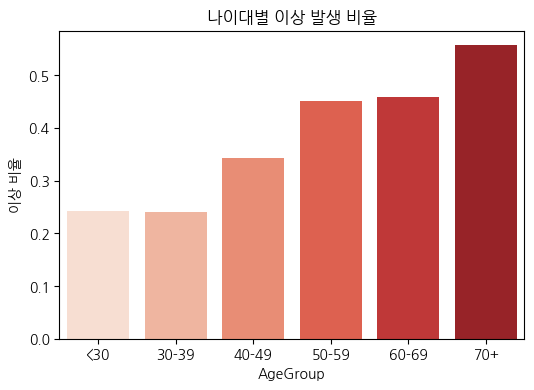

In [ ]:
# 3) 나이대별 위험 비율
bins = [0, 30, 40, 50, 60, 70, 120]
labels = ["<30","30-39","40-49","50-59","60-69","70+"]
raw["AgeGroup"] = pd.cut(raw["Age"], bins=bins, labels=labels, right=False)
plt.figure(figsize=(6,4))
sns.barplot(data=raw, x="AgeGroup", y="target", estimator="mean", errorbar=None, palette="Reds")
plt.ylabel("이상 비율")
plt.title("나이대별 이상 발생 비율")
plt.show()

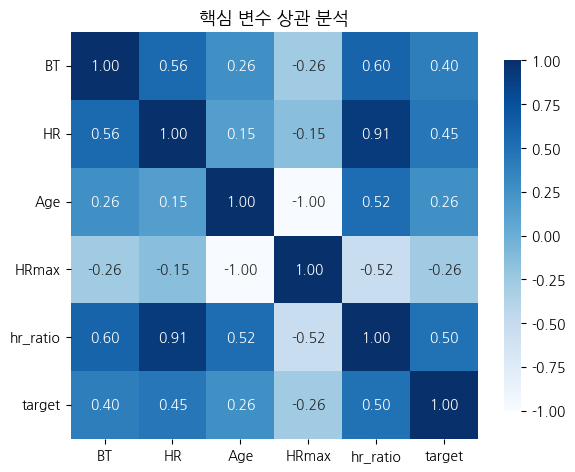

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

core_cols = ['BT','HR','Age','HRmax','hr_ratio','target']
corr = raw[core_cols].corr(numeric_only=True)

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,         # 상관계수 숫자 표시
    fmt=".2f",          # 소수점 2자리
    cmap="Blues",       # 색상 팔레트
    vmin=-1, vmax=1,    # 상관계수 범위 고정
    square=True,        # 정사각형 셀
    cbar=True,
    cbar_kws={"shrink": .8}
)

plt.yticks(rotation=0)   # 0도 → 가로 표시
plt.title("핵심 변수 상관 분석", fontsize=13)
plt.tight_layout()
plt.show()


# 데이터 분할 Train / Test split

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 13.2 MB/s eta 0:00:00


In [ ]:
# optuna version
import optuna
optuna.__version__

'4.5.0'

# 모델 학습 및 평가

## 하이퍼파라미터 튜닝

### XGB + early_stopping

In [ ]:
# ===============================================
# XGBoost (xgb.train) + Optuna (PR-AUC 최적화, Early Stopping)
# - 목적함수: 검증 PR-AUC(=Average Precision) 최대화
# - early stopping: K-Fold 각 fold에서 적용
# - 최종 threshold: train 내부 valid에서 선정 → test에 적용
# ===============================================

import numpy as np
import random
import optuna
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt

from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    average_precision_score, precision_recall_curve,
    classification_report, confusion_matrix
)

print("xgboost:", xgb.__version__)
print("optuna:", optuna.__version__)
print("sklearn:", sklearn.__version__)

xgboost: 3.0.4
optuna: 4.5.0
sklearn: 1.6.1


In [ ]:
# ===============================================
# 1) 재현성 고정
# ===============================================
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

sampler = TPESampler(seed=SEED, multivariate=True, group=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# 클래스 불균형 비율(음성/양성) → scale_pos_weight의 기준
neg_pos = (y_train == 0).sum() / max(1, (y_train == 1).sum())

/usr/local/lib/python3.12/dist-packages/optuna/_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/optuna/_experimental.py:32: ExperimentalWarning: Argument ``group`` is an experimental feature. The interface can change in the future.
  warnings.warn(


In [ ]:
# ===============================================
# 1.5) 도우미: xgb.train + early_stopping 실행
#  - eval_metric='aucpr'로 PR 최적화에 유리
#  - evals_result(딕셔너리)에 학습 이력 기록 (중요!)
#  - best_iteration 사용해 예측 시 과적합 방지
# ===============================================
def train_with_es(X_tr, y_tr, X_va, y_va, params, num_boost_round=800, es_rounds=80, verbose=False):
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    dvalid = xgb.DMatrix(X_va, label=y_va)

    evals_result = {}  # <-- 학습 이력 담길 빈 dict (중요)
    booster = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_boost_round,                # 상한 트리 수
        evals=[(dtrain, "train"), (dvalid, "valid")],
        early_stopping_rounds=es_rounds,                # 조기 종료 (중요)
        evals_result=evals_result,                      # 학습 이력 dict 채움 (중요)
        verbose_eval=False if not verbose else 50       # 50 iter마다 로그
    )
    return booster, evals_result

In [ ]:
# ===============================================
# 2) Optuna 목적함수 (검증 PR-AUC 최대화)
#    - fold별 early stopping 적용
#    - 반환: fold 평균 PR-AUC
# ===============================================
def objective_xgb(trial):
    # xgb.train 파라미터 네이밍 주의(eta, alpha, lambda 등)
    params = {
        "objective": "binary:logistic",
        "eval_metric": "aucpr",                       # PR-AUC 기준 (중요)
        "tree_method": "hist",
        "eta": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "lambda": trial.suggest_float("reg_lambda", 0.0, 2.0),
        # 불균형 보정: 과대/과소 교정 방지 위해 좁은 탐색 범위 권장 (±20%)
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", max(1.0, neg_pos*0.8), neg_pos*1.2),
        "seed": SEED,
        "nthread": 1,                                  # 완전 결정성 위해 1 (속도↑ 원하면 >1 가능)
    }

    n_estimators = trial.suggest_int("n_estimators", 200, 800)
    es_rounds    = trial.suggest_int("early_stopping_rounds", 40, 120)

    pr_aucs = []
    for tr_idx, va_idx in cv.split(X_train, y_train):
        # --- 행 인덱싱: pandas면 iloc 사용 (중요) ---
        X_tr = X_train.iloc[tr_idx] if hasattr(X_train, "iloc") else X_train[tr_idx]
        X_va = X_train.iloc[va_idx] if hasattr(X_train, "iloc") else X_train[va_idx]
        y_tr = y_train.iloc[tr_idx] if hasattr(y_train, "iloc") else y_train[tr_idx]
        y_va = y_train.iloc[va_idx] if hasattr(y_train, "iloc") else y_train[va_idx]

        booster, _ = train_with_es(
            X_tr, y_tr, X_va, y_va,
            params=params,
            num_boost_round=n_estimators,
            es_rounds=es_rounds,
            verbose=False
        )
        # best_iteration까지만 사용해 검증확률 산출 (중요)
        dvalid = xgb.DMatrix(X_va)
        proba_va = booster.predict(dvalid, iteration_range=(0, booster.best_iteration + 1))
        pr_aucs.append(average_precision_score(y_va, proba_va))

    return float(np.mean(pr_aucs))

In [ ]:
# ===============================================
# 3) 최적화 실행
# ===============================================
study_xgb = optuna.create_study(direction="maximize", study_name="XGB_PR_AUC", sampler=sampler)
study_xgb.optimize(objective_xgb, n_trials=60, show_progress_bar=True)

[I 2025-08-20 04:47:11,134] A new study created in memory with name: XGB_PR_AUC


  0%|          | 0/60 [00:00<?, ?it/s]

[I 2025-08-20 04:47:11,877] Trial 0 finished with value: 0.7508695406073213 and parameters: {'learning_rate': 0.03574712922600244, 'max_depth': 8, 'min_child_weight': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.11616722433639892, 'scale_pos_weight': 1.623745605051351, 'n_estimators': 561, 'early_stopping_rounds': 97}. Best is trial 0 with value: 0.7508695406073213.
[I 2025-08-20 04:47:13,052] Trial 1 finished with value: 0.7554046294691489 and parameters: {'learning_rate': 0.010725209743171997, 'max_depth': 8, 'min_child_weight': 9, 'subsample': 0.6849356442713105, 'colsample_bytree': 0.6727299868828402, 'reg_alpha': 0.18340450985343382, 'reg_lambda': 0.6084844859190754, 'scale_pos_weight': 1.4303245687572943, 'n_estimators': 459, 'early_stopping_rounds': 63}. Best is trial 1 with value: 0.7554046294691489.
[I 2025-08-20 04:47:14,199] Trial 2 finished with value: 0.7587565039913726 and parameters: {'learn

In [ ]:
best_params = study_xgb.best_trial.params
print("Best Trial Params:", best_params)
print("Best CV PR-AUC   :", round(study_xgb.best_value, 4))

Best Trial Params: {'learning_rate': 0.01357025150659362, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.614097879445024, 'colsample_bytree': 0.7421551047478742, 'reg_alpha': 0.3547851194793775, 'reg_lambda': 0.4985968441000626, 'scale_pos_weight': 1.337052484184754, 'n_estimators': 769, 'early_stopping_rounds': 57}
Best CV PR-AUC   : 0.7629


In [ ]:
# xgb.train 파라미터로 변환
best_xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "aucpr",
    "tree_method": "hist",
    "eta": best_params["learning_rate"],
    "max_depth": best_params["max_depth"],
    "min_child_weight": best_params["min_child_weight"],
    "subsample": best_params["subsample"],
    "colsample_bytree": best_params["colsample_bytree"],
    "alpha": best_params["reg_alpha"],
    "lambda": best_params["reg_lambda"],
    "scale_pos_weight": best_params["scale_pos_weight"],
    "seed": SEED,
    "nthread": 1,
}
best_n_estimators = best_params["n_estimators"]
best_es_rounds    = best_params.get("early_stopping_rounds", 80)

In [ ]:
# ===============================================
# 4) 최종 학습 (train 내부에서 검증 분리 → ES & 임계값 결정)
#    - test는 절대 관여시키지 않음 (누수 방지)
# ===============================================
X_tr, X_va, y_tr, y_va = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED
)

final_booster, hist = train_with_es(
    X_tr, y_tr, X_va, y_va,
    params=best_xgb_params,
    num_boost_round=best_n_estimators,
    es_rounds=best_es_rounds,
    verbose=False
)

print(f"Best iteration (final): {final_booster.best_iteration + 1} / {best_n_estimators}")

Best iteration (final): 77 / 769


In [ ]:
# ===============================================
# 5) 임계값 튜닝 (목표 Recall 달성)
#    - 검증 셋(PR-커브)에서 threshold 선택 → test에 적용
# ===============================================
dval = xgb.DMatrix(X_va)
val_proba = final_booster.predict(dval, iteration_range=(0, final_booster.best_iteration + 1))

target_recall = 0.85
prec, rec, thr = precision_recall_curve(y_va, val_proba)

# rec ≥ target_recall 구간 중 '가장 높은 threshold' 선택 → 오탐 감소 유도 (중요)
idxs = np.where(rec >= target_recall)[0]
if len(idxs) and idxs[-1] < len(thr):
    tuned_th = float(thr[idxs[-1]])
else:
    tuned_th = 0.5  # fallback (해당 구간이 없을 경우)
print(f"Tuned threshold from VALID for recall≥{target_recall}: {tuned_th:.3f}")

Tuned threshold from VALID for recall≥0.85: 0.377


In [ ]:
# ===============================================
# 6) 테스트 평가 (기본 0.5 vs 튠드 threshold)
# ===============================================
dtest = xgb.DMatrix(X_test)
test_proba = final_booster.predict(dtest, iteration_range=(0, final_booster.best_iteration + 1))

# (a) 기본 0.5
y_pred_05 = (test_proba >= 0.5).astype(int)
print("\n[Test Report @ default threshold 0.5]")
print(classification_report(y_test, y_pred_05, digits=2, zero_division=0))
print("Confusion Matrix @0.5\n", confusion_matrix(y_test, y_pred_05, labels=[0, 1]))


[Test Report @ default threshold 0.5]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       333
           1       0.71      0.56      0.62       216

    accuracy                           0.73       549
   macro avg       0.73      0.70      0.71       549
weighted avg       0.73      0.73      0.73       549

Confusion Matrix @0.5
 [[283  50]
 [ 96 120]]


In [ ]:
# (b) 튠드 threshold
y_pred_tuned = (test_proba >= tuned_th).astype(int)
print(f"\n[Test Report @ tuned threshold {tuned_th:.3f}]")
print(classification_report(y_test, y_pred_tuned, digits=2, zero_division=0))
print("Confusion Matrix @tuned\n", confusion_matrix(y_test, y_pred_tuned, labels=[0, 1]))


[Test Report @ tuned threshold 0.377]
              precision    recall  f1-score   support

           0       0.83      0.43      0.57       333
           1       0.49      0.86      0.63       216

    accuracy                           0.60       549
   macro avg       0.66      0.65      0.60       549
weighted avg       0.70      0.60      0.59       549

Confusion Matrix @tuned
 [[143 190]
 [ 30 186]]


### VALID 기준, Threshold 조정 결과

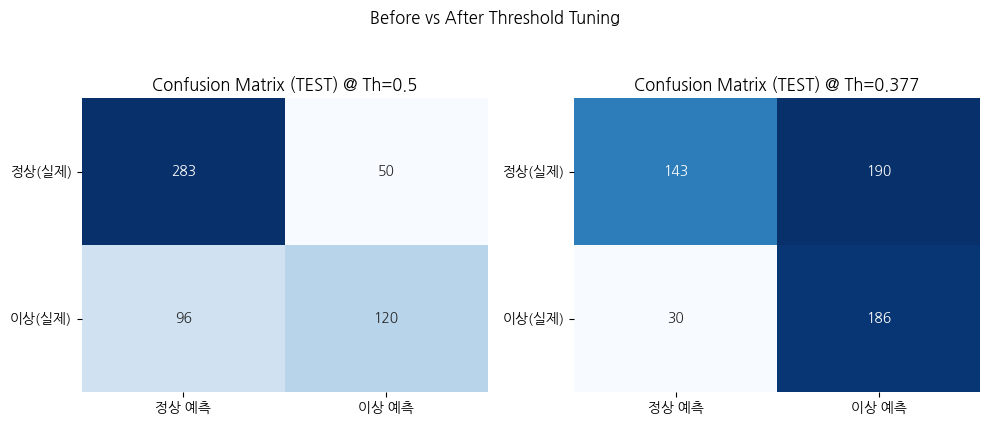

Saved: /content/drive/MyDrive/AI/figs/cm_before_after_th_0.377.png


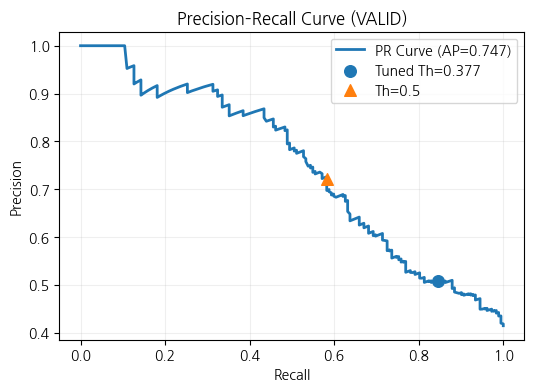

Saved: /content/drive/MyDrive/AI/figs/pr_curve_valid_th_0.377.png


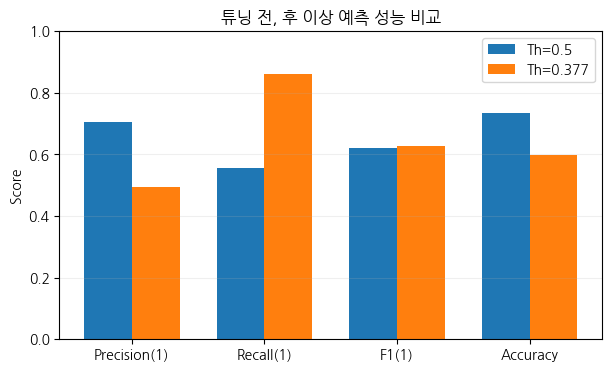

Saved: /content/drive/MyDrive/AI/figs/metrics_bar_test_th_0.377.png


In [ ]:
# 필요한 모듈
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve, average_precision_score,
    precision_recall_fscore_support, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 저장 폴더
FIG_DIR = "/content/drive/MyDrive/AI/figs"
os.makedirs(FIG_DIR, exist_ok=True)

# -------------------------------
# 1) Confusion Matrix: Before vs After (TEST)
# -------------------------------
cm_before = confusion_matrix(y_test, y_pred_05,      labels=[0,1])
cm_after  = confusion_matrix(y_test, y_pred_tuned,   labels=[0,1])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["정상 예측","이상 예측"], yticklabels=["정상(실제)","이상(실제)"], ax=axes[0])
axes[0].set_title("Confusion Matrix (TEST) @ Th=0.5")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

sns.heatmap(cm_after, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["정상 예측","이상 예측"], yticklabels=["정상(실제)","이상(실제)"], ax=axes[1])
axes[1].set_title(f"Confusion Matrix (TEST) @ Th={tuned_th:.3f}")
axes[1].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

plt.suptitle("Before vs After Threshold Tuning", y=1.05, fontsize=12)
plt.tight_layout()
cm_path = os.path.join(FIG_DIR, f"cm_before_after_th_{tuned_th:.3f}.png")
plt.savefig(cm_path, dpi=200, bbox_inches="tight")
plt.show()
print("Saved:", cm_path)

# -------------------------------
# 2) Precision–Recall Curve (VALID, calibrated 없는 베이스라인 버전)
#    - 운영점 두 개 표시: Th=0.5 / Th=tuned
# -------------------------------
prec_v, rec_v, thr_v = precision_recall_curve(y_va, val_proba)
ap_v = average_precision_score(y_va, val_proba)

plt.figure(figsize=(6,4))
plt.plot(rec_v, prec_v, lw=2, label=f'PR Curve (AP={ap_v:.3f})')
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curve (VALID)")
plt.grid(alpha=0.2)

# 운영점: tuned_th
idx_tuned = int(np.argmin(np.abs(thr_v - tuned_th)))
op_r_tuned = rec_v[idx_tuned+1]   # 주의: thr_v 길이는 prec/rec보다 1 작음
op_p_tuned = prec_v[idx_tuned+1]
plt.scatter([op_r_tuned], [op_p_tuned], s=70, zorder=3,
            label=f"Tuned Th={tuned_th:.3f}")

# 운영점: 0.5
idx_05 = int(np.argmin(np.abs(thr_v - 0.5)))
op_r_05 = rec_v[idx_05+1]
op_p_05 = prec_v[idx_05+1]
plt.scatter([op_r_05], [op_p_05], s=70, marker="^", zorder=3,
            label="Th=0.5")

plt.legend()
pr_path = os.path.join(FIG_DIR, f"pr_curve_valid_th_{tuned_th:.3f}.png")
plt.savefig(pr_path, dpi=200, bbox_inches="tight")
plt.show()
print("Saved:", pr_path)

# -------------------------------
# 3) 성능 지표 Bar Chart (TEST)
#    - 이상(1) 클래스의 Precision/Recall/F1 + Accuracy 비교
# -------------------------------
def metrics_for(y_true, y_pred):
    # pos_label=1 기준의 정밀/재현/F1
    p, r, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=[1], average="binary", zero_division=0
    )
    acc = accuracy_score(y_true, y_pred)
    return p, r, f1, acc

p0, r0, f10, acc0 = metrics_for(y_test, y_pred_05)
p1, r1, f11, acc1 = metrics_for(y_test, y_pred_tuned)

labels = ["Precision(1)", "Recall(1)", "F1(1)", "Accuracy"]
before = [p0, r0, f10, acc0]
after  = [p1, r1, f11, acc1]

x = np.arange(len(labels))
w = 0.36

plt.figure(figsize=(7,4))
plt.bar(x - w/2, before, width=w, label="Th=0.5")
plt.bar(x + w/2, after,  width=w, label=f"Th={tuned_th:.3f}")
plt.xticks(x, labels)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("튜닝 전, 후 이상 예측 성능 비교")
plt.legend()
plt.grid(axis="y", alpha=0.2)
bar_path = os.path.join(FIG_DIR, f"metrics_bar_test_th_{tuned_th:.3f}.png")
plt.savefig(bar_path, dpi=200, bbox_inches="tight")
plt.show()
print("Saved:", bar_path)


In [ ]:
# base vs tuned
from xgboost import XGBClassifier

base = XGBClassifier(eval_metric='logloss', random_state=42)
base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

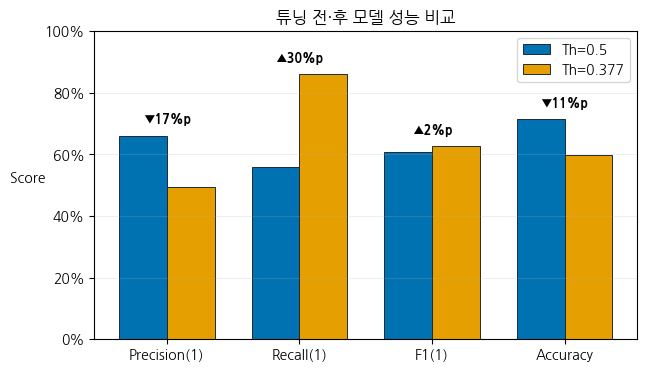

Saved: /content/drive/MyDrive/AI/figs/metrics_bar_test_th_0.377.png


In [ ]:
from matplotlib.ticker import PercentFormatter

base_predict = base.predict(X_test)

p0, r0, f10, acc0 = metrics_for(y_test, base_predict)
p1, r1, f11, acc1 = metrics_for(y_test, y_pred_tuned)

labels = ["Precision(1)", "Recall(1)", "F1(1)", "Accuracy"]
before = [p0, r0, f10, acc0]
after  = [p1, r1, f11, acc1]

x = np.arange(len(labels))
w = 0.36

plt.figure(figsize=(7,4))

# 밝은 톤 컬러 + 테두리
c_before = "#0072B2"
c_after  = "#E69F00"
edge     = "#1F2937"   # dark gray edge

plt.bar(x - w/2, before, width=w, label="Th=0.5",
        color=c_before, edgecolor=edge, linewidth=0.7)
plt.bar(x + w/2, after,  width=w, label=f"Th={tuned_th:.3f}",
        color=c_after,  edgecolor=edge, linewidth=0.7)

plt.xticks(x, labels)
plt.ylim(0, 1)

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # y축을 %로
ax.set_ylabel("Score", rotation=0, labelpad=12)      # y축 레이블 가로로

plt.title("튜닝 전·후 모델 성능 비교")
plt.legend()
plt.grid(axis="y", alpha=0.2)

# # 변화량(Δ)만 표시 (축 내부)
# for i, (bfr, aft) in enumerate(zip(before, after)):
#     delta = aft - bfr
#     y = min(max(bfr, aft) + 0.03, 0.98)
#     plt.text(x[i], y, f"Δ {delta:+.2%}",
#              ha="center", va="bottom", fontsize=9, fontweight="bold")
for i, (bfr, aft) in enumerate(zip(before, after)):
    delta = aft - bfr
    sign = "▲" if delta >= 0 else "▼"
    y = min(max(bfr, aft) + 0.03, 0.98)
    plt.text(x[i], y, f"{sign}{abs(delta)*100:.0f}%p",
             ha="center", va="bottom", fontsize=9, fontweight="bold")

bar_path = os.path.join(FIG_DIR, f"metrics_bar_test_th_{tuned_th:.3f}.png")
plt.savefig(bar_path, dpi=200, bbox_inches="tight")
plt.show()
print("Saved:", bar_path)

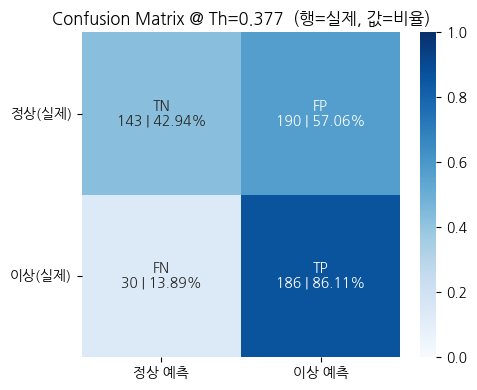

In [ ]:
def cm_heatmap_row_normalized(y_true, y_pred, title="Confusion Matrix (Row-normalized)"):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1]).astype(float)
    row_sum = cm.sum(axis=1, keepdims=True)
    cm_row = np.divide(cm, row_sum, out=np.zeros_like(cm), where=row_sum>0)

    labels = np.array([[f"TN\n{cm[0,0]:.0f} | {cm_row[0,0]:.2%}", f"FP\n{cm[0,1]:.0f} | {cm_row[0,1]:.2%}"],
                       [f"FN\n{cm[1,0]:.0f} | {cm_row[1,0]:.2%}", f"TP\n{cm[1,1]:.0f} | {cm_row[1,1]:.2%}"]])

    plt.figure(figsize=(5,4))
    ax = sns.heatmap(cm_row, annot=labels, fmt="", cmap="Blues", cbar=True, vmin=0, vmax=1,
                     xticklabels=["정상 예측","이상 예측"], yticklabels=["정상(실제)","이상(실제)"])
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.title(title + "  (행=실제, 값=비율)"); plt.tight_layout(); plt.show()

# 사용 예시
cm_heatmap_row_normalized(y_test, y_pred_tuned, title=f"Confusion Matrix @ Th={tuned_th:.3f}")


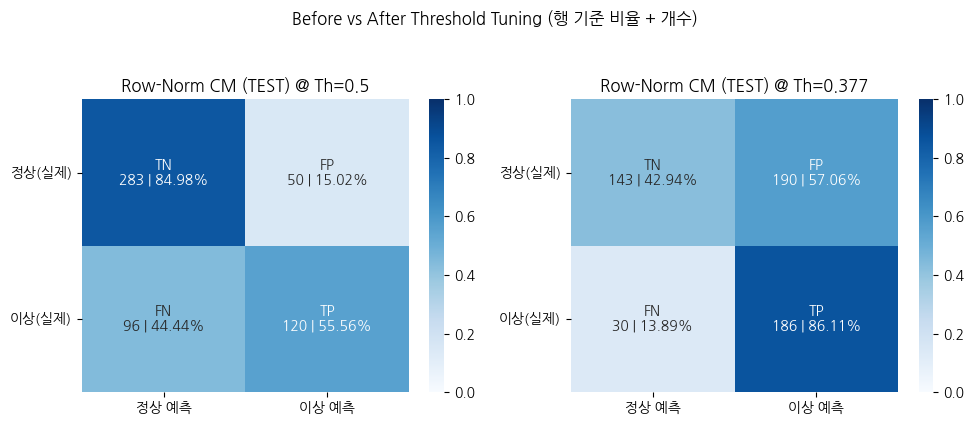

Saved: /content/drive/MyDrive/AI/figs/cm_rownorm_before_after_th_0.377.png


In [ ]:
# -------------------------------
# Confusion Matrix (Row-normalized) : Before vs After (TEST)
#  - 각 셀: 개수 | 행(실제 클래스) 기준 비율
# -------------------------------
from sklearn.metrics import confusion_matrix
import numpy as np, seaborn as sns, matplotlib.pyplot as plt
import os

def _cm_row_norm_with_labels(cm: np.ndarray):
    cm = cm.astype(float)
    row_sum = cm.sum(axis=1, keepdims=True)
    cm_row = np.divide(cm, row_sum, out=np.zeros_like(cm), where=row_sum>0)
    labels = np.array([
        [f"TN\n{cm[0,0]:.0f} | {cm_row[0,0]:.2%}", f"FP\n{cm[0,1]:.0f} | {cm_row[0,1]:.2%}"],
        [f"FN\n{cm[1,0]:.0f} | {cm_row[1,0]:.2%}", f"TP\n{cm[1,1]:.0f} | {cm_row[1,1]:.2%}"]
    ])
    return cm_row, labels

cm_before = confusion_matrix(y_test, y_pred_05,    labels=[0,1])
cm_after  = confusion_matrix(y_test, y_pred_tuned, labels=[0,1])

cm_before_row, labels_before = _cm_row_norm_with_labels(cm_before)
cm_after_row,  labels_after  = _cm_row_norm_with_labels(cm_after)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_before_row, annot=labels_before, fmt="", cmap="Blues", cbar=True,
            vmin=0, vmax=1, ax=axes[0],
            xticklabels=["정상 예측","이상 예측"],
            yticklabels=["정상(실제)","이상(실제)"])
axes[0].set_title("Row-Norm CM (TEST) @ Th=0.5")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

sns.heatmap(cm_after_row, annot=labels_after, fmt="", cmap="Blues", cbar=True,
            vmin=0, vmax=1, ax=axes[1],
            xticklabels=["정상 예측","이상 예측"],
            yticklabels=["정상(실제)","이상(실제)"])
axes[1].set_title(f"Row-Norm CM (TEST) @ Th={tuned_th:.3f}")
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.suptitle("Before vs After Threshold Tuning (행 기준 비율 + 개수)", y=1.05, fontsize=12)
plt.tight_layout()

cm_norm_path = os.path.join(FIG_DIR, f"cm_rownorm_before_after_th_{tuned_th:.3f}.png")
plt.savefig(cm_norm_path, dpi=200, bbox_inches="tight")
plt.show()
print("Saved:", cm_norm_path)



Generalization gap: max=0.0789, last=0.0441


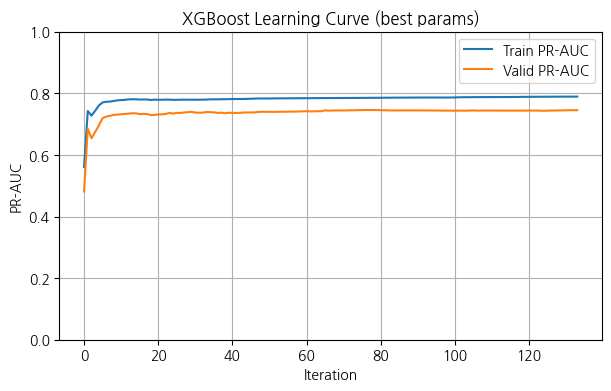

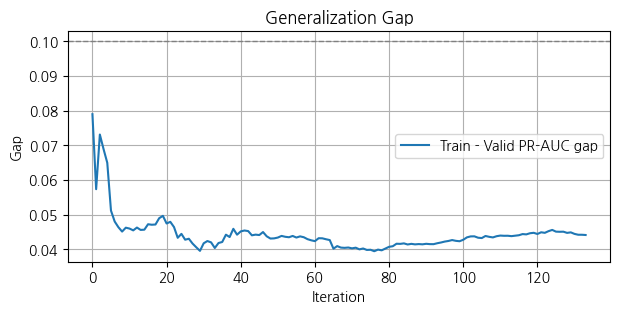

In [ ]:
# ===============================================
# 7) 학습 곡선 시각화 (Train vs Valid PR-AUC)
#    - y축 [0,1] 고정 (착시 방지)
#    - Train-Valid gap 출력
# ===============================================
train_aucpr = np.array(hist["train"]["aucpr"])  # <-- dict에서 바로 읽기 (중요)
valid_aucpr = np.array(hist["valid"]["aucpr"])
gap = train_aucpr - valid_aucpr
print(f"\nGeneralization gap: max={gap.max():.4f}, last={gap[-1]:.4f}")

plt.figure(figsize=(7,4))
plt.plot(train_aucpr, label="Train PR-AUC")
plt.plot(valid_aucpr, label="Valid PR-AUC")
plt.xlabel("Iteration"); plt.ylabel("PR-AUC")
plt.title("XGBoost Learning Curve (best params)")
plt.ylim(0, 1); plt.grid(True); plt.legend(); plt.show()

plt.figure(figsize=(7,3))
plt.plot(gap, label="Train - Valid PR-AUC gap")
plt.axhline(0.10, ls="--", lw=1, color="gray")
plt.xlabel("Iteration"); plt.ylabel("Gap"); plt.title("Generalization Gap")
plt.grid(True); plt.legend(); plt.show()

In [ ]:
# (디버깅) 확률 분포 확인
print(f"\n[Test proba stats] min={float(test_proba.min()):.4f}, "
      f"max={float(test_proba.max()):.4f}, mean={float(test_proba.mean()):.4f}, "
      f">=0.5 ratio={(test_proba >= 0.5).mean():.3f}")


[Test proba stats] min=0.2869, max=0.7796, mean=0.4693, >=0.5 ratio=0.310


### 모델 가능성 체크

In [ ]:
# === 모델 가능성 체크 (VALID PR 프런티어 확인) ===
from sklearn.metrics import precision_recall_curve
import numpy as np

# 위에서 만든 검증 세트 변수명과 통일: X_va, y_va
dval = xgb.DMatrix(X_va)
val_proba = final_booster.predict(
    dval, iteration_range=(0, final_booster.best_iteration + 1)
)

# 보정(calibrate) 안 쓰는 버전: raw 확률 그대로 사용
prec_v, rec_v, thr_v = precision_recall_curve(y_va, val_proba)

# (A) recall≥0.85일 때 얻을 수 있는 최대 precision
mask_rec = rec_v >= 0.85
max_prec_at_target_rec = float(prec_v[mask_rec].max()) if mask_rec.any() else 0.0

# (B) precision≥0.60일 때 얻을 수 있는 최대 recall
mask_prec = prec_v >= 0.60
max_rec_at_pmin = float(rec_v[mask_prec].max()) if mask_prec.any() else 0.0

print(f"VALID: max precision (rec≥0.85) = {max_prec_at_target_rec:.3f}")
print(f"VALID: max recall    (prec≥0.60) = {max_rec_at_pmin:.3f}")


VALID: max precision (rec≥0.85) = 0.510
VALID: max recall    (prec≥0.60) = 0.714


### 모델 저장

In [ ]:
import json, os

# 1) 모델 저장 (Booster)
MODEL_PATH = "/content/drive/MyDrive/AI/baseline_xgb.json"
final_booster.save_model(MODEL_PATH)

# 2) 전처리 통계 (훈련 시 사용한 값으로!)
age_median = float(raw['Age'].median())   # 네 코드에선 split 전 이미 fillna에 사용됨

# 3) 메타데이터 저장 (임계값/피처/ES 정보 등)
META_PATH = "/content/drive/MyDrive/AI/baseline_meta.json"
meta = {
    "feature_cols": feature_cols,                # ['Age','HR','HRmax','hr_ratio']
    "threshold": float(tuned_th),                # VALID에서 고른 임계값
    "target_recall": float(target_recall),       # 참고용
    "best_iteration": int(final_booster.best_iteration) + 1,  # ES 반영 예측에 사용
    "preprocessing": {
        "age_to_numeric": True,
        "hr_to_numeric": True,
        "age_fillna_median": age_median,
        "dropna_hr": True,
        "engineer": ["HRmax = 220 - Age", "hr_ratio = HR/HRmax"]
    },
    "xgboost_version": xgb.__version__,
    "seed": SEED
}
with open(META_PATH, "w") as f:
    json.dump(meta, f, indent=2)

print("Saved:\n ", MODEL_PATH, "\n ", META_PATH)


Saved:
  /content/drive/MyDrive/AI/baseline_xgb.json 
  /content/drive/MyDrive/AI/baseline_meta.json
